In [117]:
import urllib.request
import csv
import codecs

In [118]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

In [119]:
dat = urllib.request.urlopen(url)

In [120]:
reader = csv.reader(codecs.iterdecode(dat, 'utf-8'))

In [121]:
data = []
for row in reader:
    data.append(row)

In [122]:
data[:10]

[['PassengerId',
  'Survived',
  'Pclass',
  'Name',
  'Sex',
  'Age',
  'SibSp',
  'Parch',
  'Ticket',
  'Fare',
  'Cabin',
  'Embarked'],
 ['1',
  '0',
  '3',
  'Braund, Mr. Owen Harris',
  'male',
  '22',
  '1',
  '0',
  'A/5 21171',
  '7.25',
  '',
  'S'],
 ['2',
  '1',
  '1',
  'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
  'female',
  '38',
  '1',
  '0',
  'PC 17599',
  '71.2833',
  'C85',
  'C'],
 ['3',
  '1',
  '3',
  'Heikkinen, Miss. Laina',
  'female',
  '26',
  '0',
  '0',
  'STON/O2. 3101282',
  '7.925',
  '',
  'S'],
 ['4',
  '1',
  '1',
  'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
  'female',
  '35',
  '1',
  '0',
  '113803',
  '53.1',
  'C123',
  'S'],
 ['5',
  '0',
  '3',
  'Allen, Mr. William Henry',
  'male',
  '35',
  '0',
  '0',
  '373450',
  '8.05',
  '',
  'S'],
 ['6',
  '0',
  '3',
  'Moran, Mr. James',
  'male',
  '',
  '0',
  '0',
  '330877',
  '8.4583',
  '',
  'Q'],
 ['7',
  '0',
  '1',
  'McCarthy, Mr. Timothy J',
  'male',
  '54',
  '0',
  

In [123]:
names = data[0]
del data[0]

In [124]:
survived = [int(i[1]) for i in data]
pclass = [int(i[2]) for i in data]

In [125]:
def f(x):
    if x == 'male':
        return 0
    elif x == 'female':
        return 1
    else:
        return -1
sex = [f(i[4]) for i in data]

In [126]:
age = [float(i[5]) for i in data if i[5]]

In [127]:
fare = [float(i[9]) for i in data]

In [128]:
print("{}% missing data in Age".format((1 - len(age)/len(data)) * 1000 // 10))

19.0% missing data in Age


In [129]:
def mean(x):
    return sum(x) / len(x)

mean(age)

29.69911764705882

In [130]:
def median(x):
    sorted_x = sorted(x)
    length = len(x)
    mid = length // 2
    if length % 2:
        return sorted_x[mid]
    else:
        return mean([(sorted_x[mid] + sorted_x[mid -1]) / 2])
median(age)

28.0

In [131]:
from collections import Counter

In [132]:
def mode(x):
    counts = Counter(x)
    max_val = max(counts.values())
    return [k for k, count in counts.items() if count == max_val]
mode(age)

[24.0]

In [133]:
def quantile(x, p):
    p_idx = int(p * len(x))
    return sorted(x)[p_idx]

In [134]:
print(quantile(age, 0.25))
print(quantile(age, 0.50))
print(quantile(age, 0.75))


20.0
28.0
38.0


In [135]:
def data_range(x):
    return max(x) - min(x)
data_range(age)

79.58

In [136]:
age = [float(i[5]) if i[5] else median(age) for i in data]

In [137]:
%matplotlib inline
import matplotlib.pyplot as plot

In [138]:
def box_plot(x):
    plot.boxplot(x)
    
cls1 = [Fare for Fare, cls in zip(fare, pclass) if cls == 1]
cls2 = [Fare for Fare, cls in zip(fare, pclass) if cls == 2]
cls3 = [Fare for Fare, cls in zip(fare, pclass) if cls == 3]

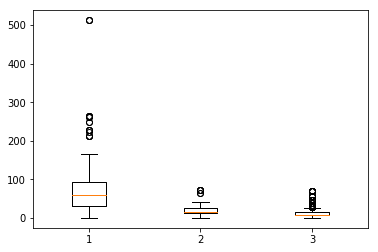

In [139]:
box_plot([cls1, cls2, cls3])

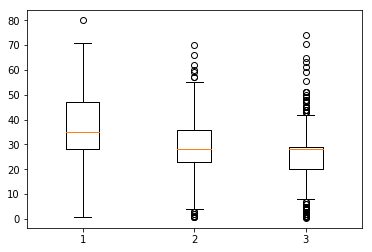

In [140]:
cls1 = [Age for Age, cls in zip(age, pclass) if cls == 1]
cls2 = [Age for Age, cls in zip(age, pclass) if cls == 2]
cls3 = [Age for Age, cls in zip(age, pclass) if cls == 3]

box_plot([cls1, cls2, cls3])

In [141]:
def variance(x):
    m = mean(x)
    dev = [(i - m) ** 2 for i in x]
    return sum([d for d in dev]) / (len(x) - 1)    

In [142]:
def std(x):
    return variance(x) ** 0.5

In [143]:
std(fare)

49.693428597180905

In [144]:
std(age)

13.019696550973194

TypeError: 'str' object is not callable

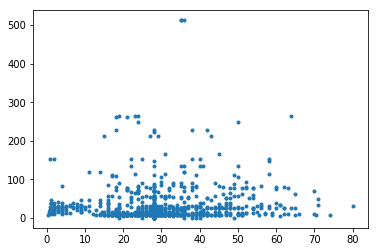

In [145]:
plot.plot(age, fare, '.')
plot.xlabel('Age')
plot.ylabel('Fare')
plot.show()

In [146]:
def dot(x, y):
    return sum([i * j for i,j in zip(x, y)])

def covarience(x, y):
    m_x = mean(x)
    m_y = mean(y)
    dev_x = [i - m_x for i in x]
    dev_y = [i - m_y for i in y]
    return dot(dev_x, dev_y) / (len(x) - 1)
    

In [147]:
def correlation(x, y):
    std_x = std(x)
    std_y = std(y)
    if std_x > 0 and std_y > 0:
        return covarience(x, y) / std_x / std_y
    else:
        return 0

In [148]:
correlation(pclass, fare)

-0.5494996199439061

In [149]:
from math import floor
def make_bucket(x, bucket_size):
    return Counter([bucket_size * floor(i / bucket_size) for i in x])

In [150]:
def hist(x, bucket_size, title='', xlabel='', ylabel=''):
    hist_data = make_bucket(x, bucket_size)
    plot.bar(hist_data.keys(), hist_data.values(), width=bucket_size)
    plot.xlabel = xlabel
    plot.ylabel = ylabel
    plot.title = title
    plot.show

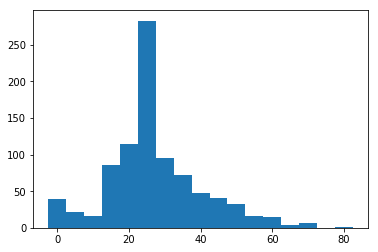

In [151]:
hist(age, 5, title='age', xlabel='Age', ylabel='Freq')

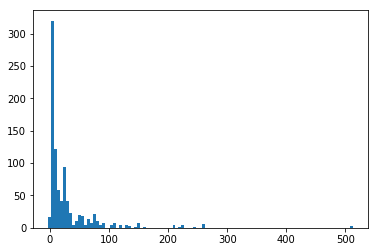

In [154]:
hist(fare, 5)

In [155]:
mean(fare)

32.2042079685746

In [156]:
mode(fare)

[8.05]

In [157]:
buckets = make_bucket(age, 5)

In [163]:
def count_survivors(buckets, bucket_size):
    res = {}
    for bucket, freq in buckets.items():
        for s, a in zip(survived, age):
            if bucket <= a < bucket + bucket_size:
                res[bucket] = res.get(bucket, 0) + s
    return res

In [164]:
count_survivors(buckets, 5)

{0: 27,
 5: 11,
 10: 7,
 15: 34,
 20: 39,
 25: 90,
 30: 40,
 35: 33,
 40: 18,
 45: 16,
 50: 14,
 55: 6,
 60: 6,
 65: 0,
 70: 0,
 80: 1}

In [165]:
c = count_survivors(buckets, 5)

<BarContainer object of 16 artists>

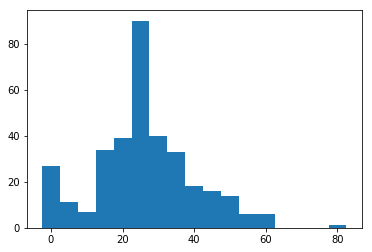

In [167]:
plot.bar(c.keys(), c.values(), width=5)

In [170]:
sex_survival = {}
for sx, survive in zip(sex, survived):
    sex_survival[sx] = sex_survival.get(sx, 0) + survive